In [20]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [21]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [22]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [23]:
series = pd.read_csv("monthly-boston-armed-robberies-j.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


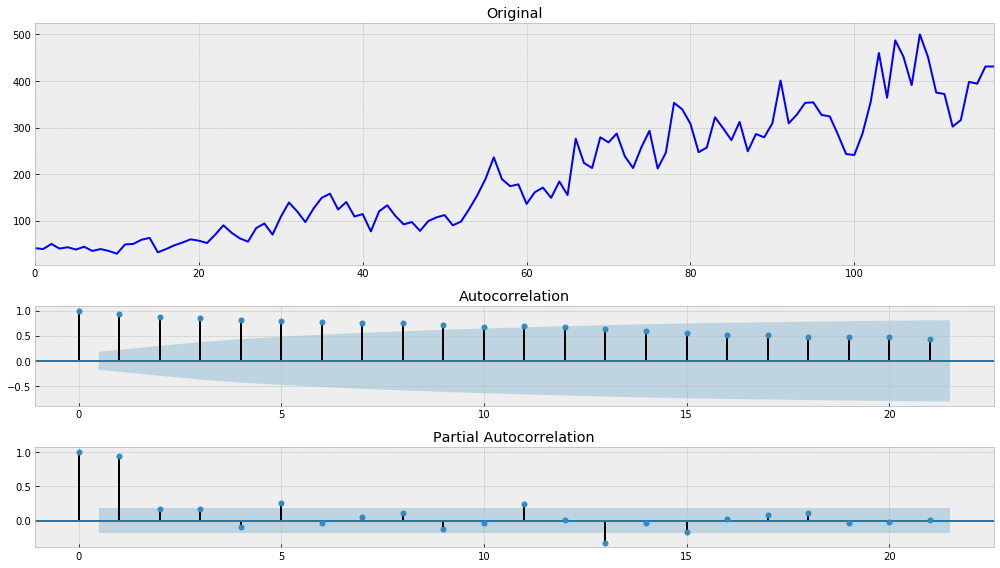

In [24]:
tsplot(series)

На основе теста Дики-Фуллера и графиков коррелограмм делаем вывод о нестационарности ряда. Используем преобразование Бокса-Кокса для изменения дисперсии.

In [25]:
series = boxcox(series, 0)

Results of Dickey-Fuller Test:
Test Statistic                  -2.013161
p-value                          0.280833
#Lags Used                      10.000000
Number of Observations Used    107.000000
Critical Value (1%)             -3.492996
Critical Value (5%)             -2.888955
Critical Value (10%)            -2.581393
dtype: float64


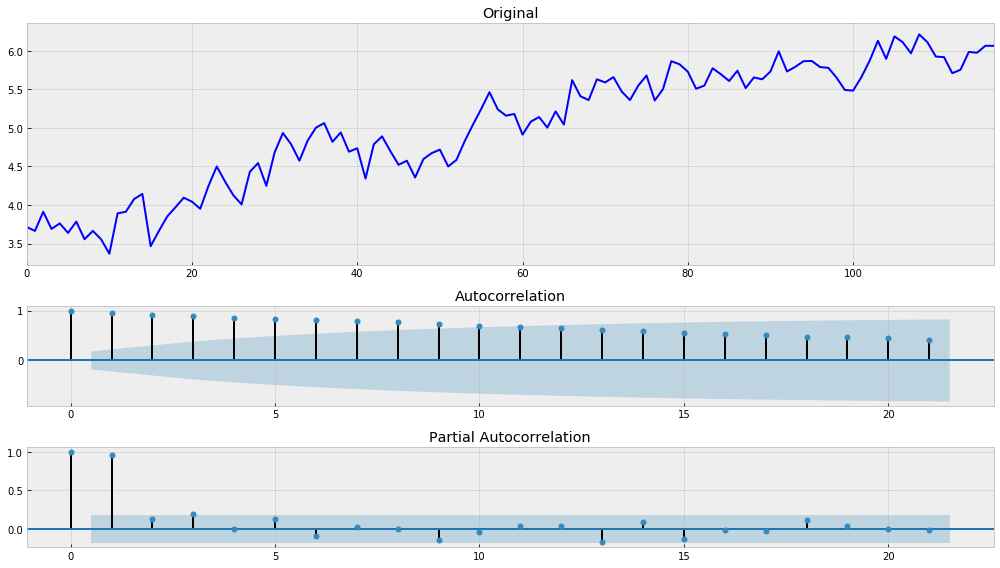

In [26]:
tsplot(series)

Уменьшился размах дисперсии, но значение p-value еще велико. По графику ряда видно наличие тренда. Уберем его дифференцированием.

In [31]:
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                -6.793421e+00
p-value                        2.333333e-09
#Lags Used                     1.300000e+01
Number of Observations Used    1.010000e+02
Critical Value (1%)           -3.496818e+00
Critical Value (5%)           -2.890611e+00
Critical Value (10%)          -2.582277e+00
dtype: float64


/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


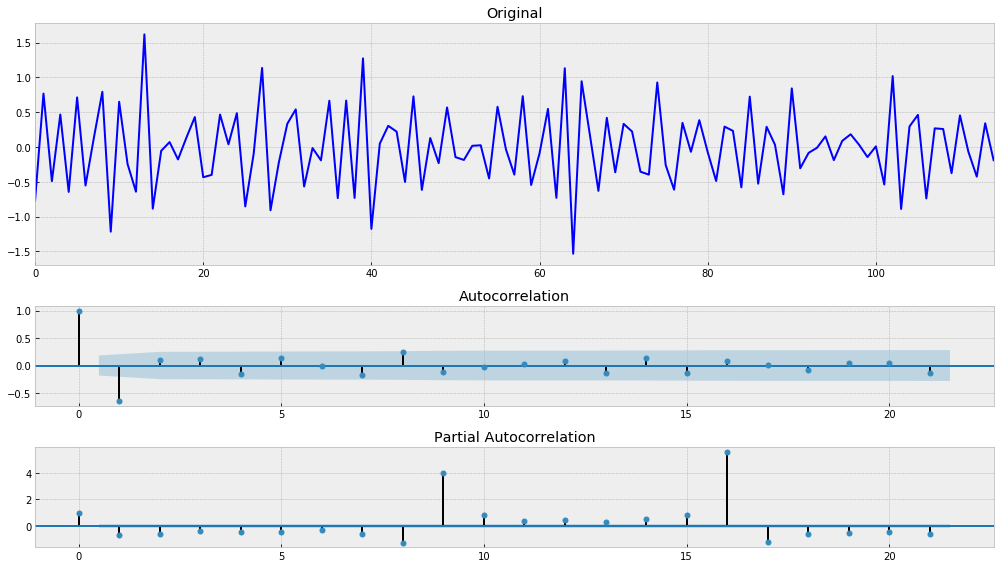

In [33]:
tsplot(series)

Удалось избавиться от тренда, но значение p-value увеличилось. Используем дифференцирование еще раз.

In [35]:
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                -6.525581e+00
p-value                        1.016610e-08
#Lags Used                     1.300000e+01
Number of Observations Used    1.000000e+02
Critical Value (1%)           -3.497501e+00
Critical Value (5%)           -2.890906e+00
Critical Value (10%)          -2.582435e+00
dtype: float64


/Users/olgakhamtsova/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1358: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


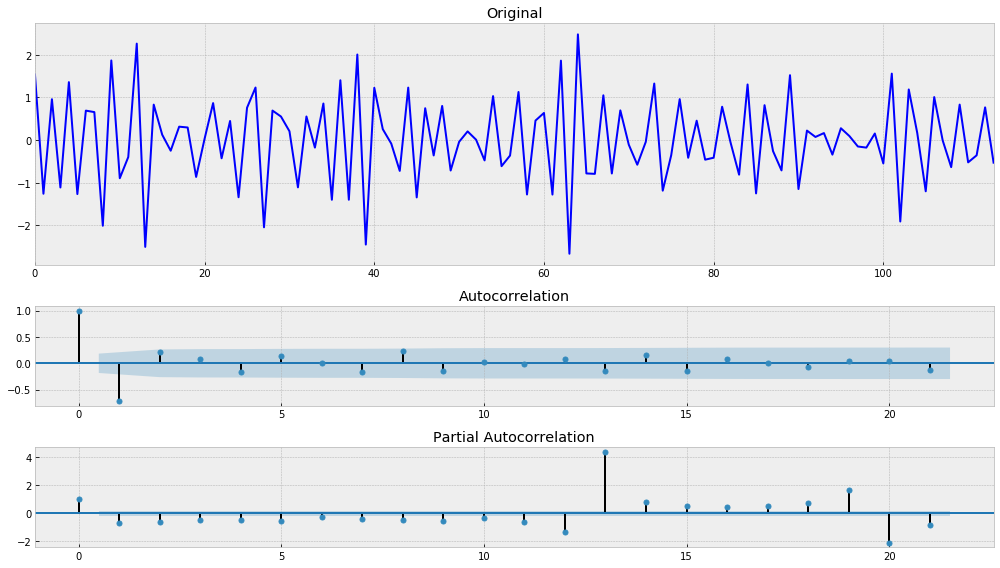

In [36]:
tsplot(series)

Значение p-value уменьшилось, но недостаточно. Продолжаем дифференцировать.

In [37]:
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                -6.747981e+00
p-value                        3.000998e-09
#Lags Used                     1.300000e+01
Number of Observations Used    9.900000e+01
Critical Value (1%)           -3.498198e+00
Critical Value (5%)           -2.891208e+00
Critical Value (10%)          -2.582596e+00
dtype: float64


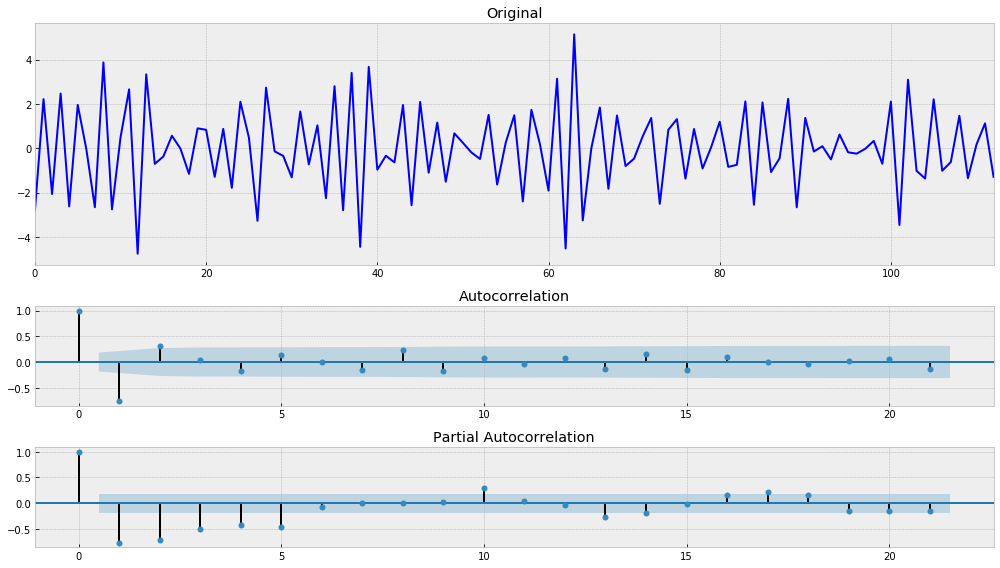

In [38]:
tsplot(series)

In [39]:
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.959380e+00
p-value                        2.976897e-12
#Lags Used                     1.300000e+01
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64


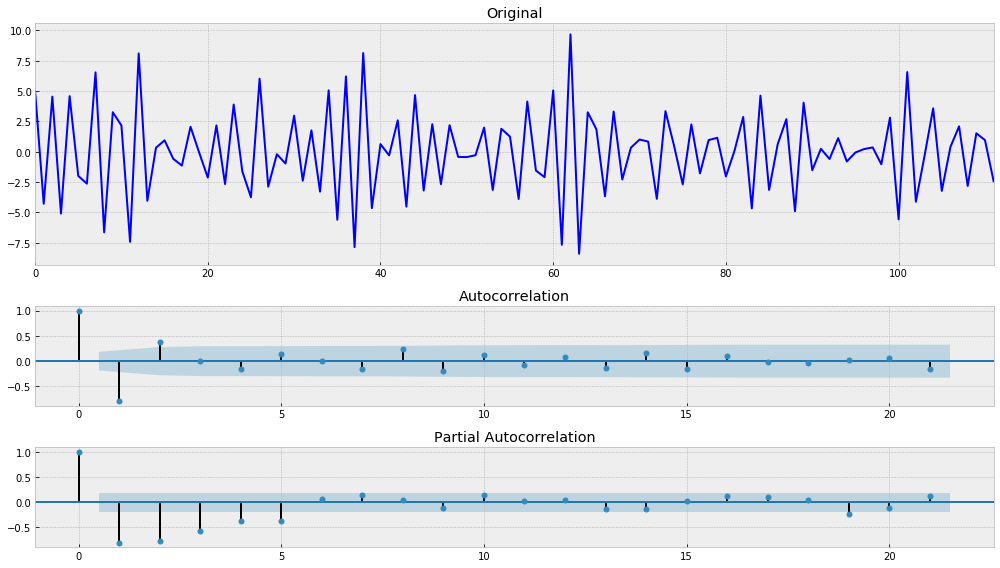

In [41]:
tsplot(series)

Продифференцировав данный временной ряд несколько раз, нам так и не удалось привести его к стационарному виду. Для работы с таким видом данных потребуется другой метод